<a href="https://colab.research.google.com/github/acsyo/Real-Estate-Analysis-/blob/main/MyProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
from google.colab import files


uploaded = files.upload()


Saving diabetes.csv to diabetes (1).csv


## About Dataset
### Context
This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective is to predict based on diagnostic measurements whether a patient has diabetes.

### Content
Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage.

Pregnancies: Number of times pregnant

Glucose: Plasma glucose concentration a 2 hours in an oral glucose tolerance test

BloodPressure: Diastolic blood pressure (mm Hg)

SkinThickness: Triceps skin fold thickness (mm)

Insulin: 2-Hour serum insulin (mu U/ml)

BMI: Body mass index (weight in kg/(height in m)^2)

DiabetesPedigreeFunction: Diabetes pedigree function

Age: Age (years)

Outcome: Class variable (0 or 1)

### Sources:
(a) Original owners: National Institute of Diabetes and Digestive and
Kidney Diseases
(b) Donor of database: Vincent Sigillito (vgs@aplcen.apl.jhu.edu)
Research Center, RMI Group Leader
Applied Physics Laboratory
The Johns Hopkins University
Johns Hopkins Road
Laurel, MD 20707
(301) 953-6231
(c) Date received: 9 May 1990

# Project
### Objective: explore dataset and possible correlation between diabetes diagnosis and some of the datapoints in the dataset.

First, we'll import and explore the data using functions: head(), info() and describe()

In [21]:
data = pd.read_csv("diabetes.csv")
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


Now, we can see that we have a dataset consisting of 768 entries.

In [22]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


Roughly half of those entries are of women aged 21-29. About 25% of entries shows patients aged 41-81. So, age ditribution of patients in the dataset is not even. Also we can conclude that most of the women in the dataset (>= 75%) have had at least 1 pregnancy. Let's explore the relation between the number of pregnancies and diabetes diagnosis.

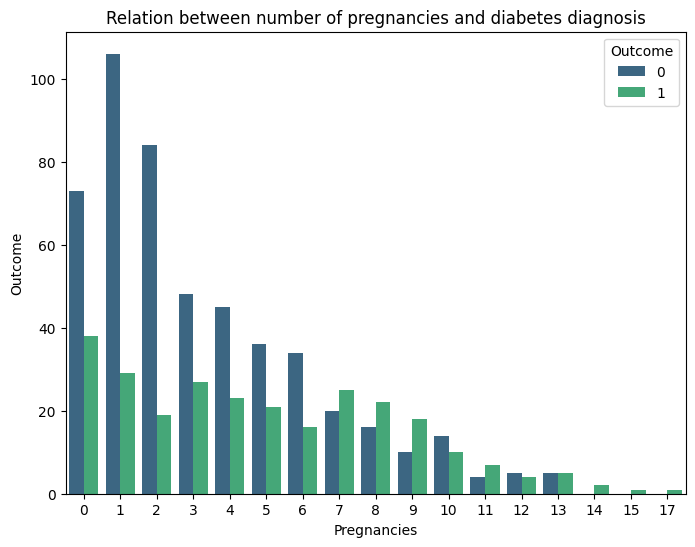

In [34]:
plt.figure(figsize = (8,6))
sns.countplot(x="Pregnancies", hue = "Outcome", data = data, palette = "viridis")
plt.title("Relation between number of pregnancies and diabetes diagnosis")
plt.xlabel("Pregnancies")
plt.ylabel("Outcome")
plt.show()

Now, we see that most of diabetes diagnosis in the dataset is among patients with no pregnancies. However, it is not a clear correlation, because we saw earlier that most of women in the dataset are aged 21-29, so maybe this result is due to a high number of younger women in the dataset. Let's find out by counting how many of those 0 pregnancies are in women aged 21-29.

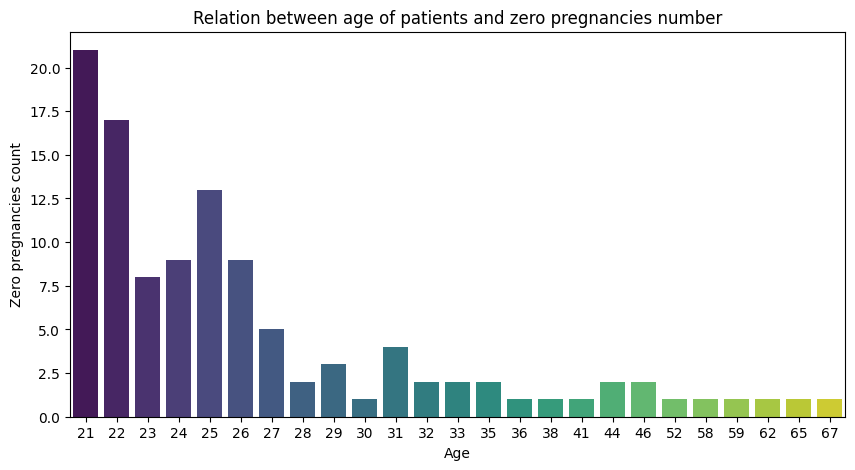

In [44]:
zero_pregnancies = data[data["Pregnancies"] == 0]
plt.figure(figsize = (10,5), edgecolor = "black")
sns.countplot(x="Age", data = zero_pregnancies, palette = "viridis")
plt.title("Relation between age of patients and zero pregnancies number")
plt.xlabel("Age")
plt.ylabel("Zero pregnancies count")
plt.show()

We see that most of 0 pregnancies in the dataset are amongst younger women aged 21-27. Earlier we saw that most of the entries in the dataset are for women in exactly same age category. So, it follows from the number of younger women in the dataset that most of diabetes diagnosis is in women with 0 pregnancies, because most of women with 0 pregnancies are young, and they are prevalent in the dataset. Thus, we can't make a conclusion about a correlation between number of pregnancies and diagnosis here.

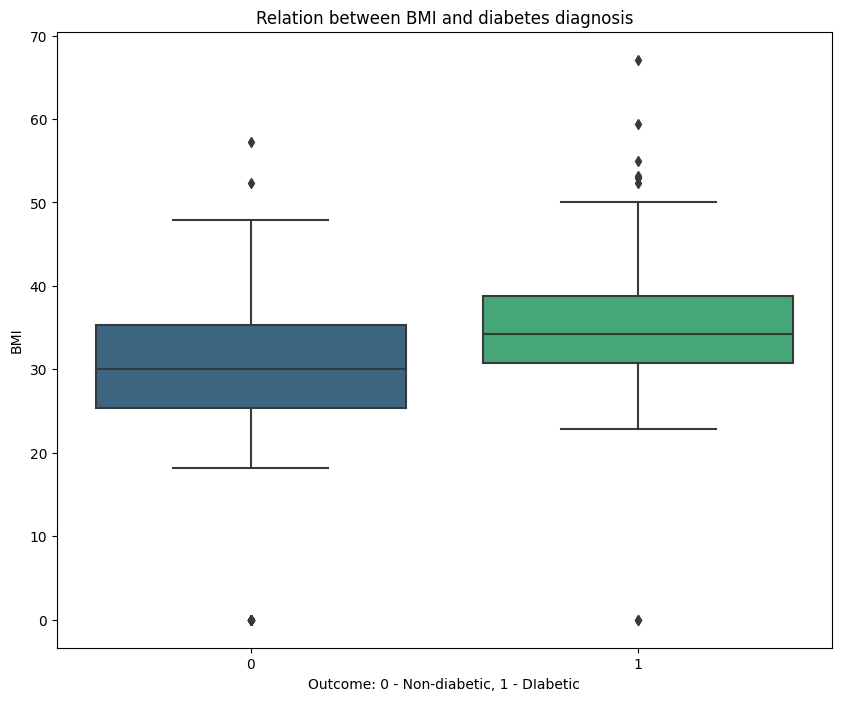

In [53]:
plt.figure(figsize = (10,8))
sns.boxplot(x="Outcome", y = "BMI", data = data, palette = "viridis")
plt.title("Relation between BMI and diabetes diagnosis")
plt.xlabel("Outcome: 0 - Non-diabetic, 1 - DIabetic")
plt.ylabel("BMI")
plt.show()

From the plot above we can conclude that median BMI of patients with diabetes is higher than median BMI in patiens without diabetes.

# Conclusion
There's a possibility of correlation between BMI and diabetes diagnosis in patients from the given dataset.